In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math 

from scipy.integrate import odeint

In [67]:
l=1e-5
k=1.001
Λ=l/k
ρ=(k-1)/k
β1=0.00023
β2=0.00078
β3=0.00064
β4=0.00074
β5=0.00014
β6=0.00008
β= β1+β2+β3+β4+β5+β6
λ1 = (0.693/56)
λ2 = (0.693/23)
λ3 = (0.693/6.2)
λ4 = (0.693/2.3)
λ5 = (0.693/0.61)
λ6 = (0.693/0.23)

n0,C10,C20,C30,C40,C50,C60=100,0,0,0,0,0,0

In [68]:

def model(y,t):
    n,C1,C2,C3,C4,C5,C6=y
    dndt = ((ρ-β) / Λ) * n +(  (λ1 * C1) 
                            +  (λ2 * C2) 
                            +  (λ3 * C3) 
                            +  (λ4 * C4) 
                            +  (λ5 * C5)
                            +  (λ6 * C6))
    
    dC1dt=(β1 / Λ) * n    -  (λ1 * C1)
    dC2dt=(β2 / Λ) * n    -  (λ2 * C2)
    dC3dt=(β3 / Λ) * n    -  (λ3 * C3)
    dC4dt=(β4 / Λ) * n    -  (λ4 * C4)
    dC5dt=(β5 / Λ) * n    -  (λ5 * C5)
    dC6dt=(β6 / Λ) * n    -  (λ6 * C6)
    
    return dndt,dC1dt,dC2dt,dC3dt,dC4dt,dC5dt,dC6dt
    

t = np.arange(0, 100, 0.1) 
y0 = n0,C10,C20,C30,C40,C50,C60 

ret = odeint(model,y0,t= t)
n,C1,C2,C3,C4,C5,C6= ret.T

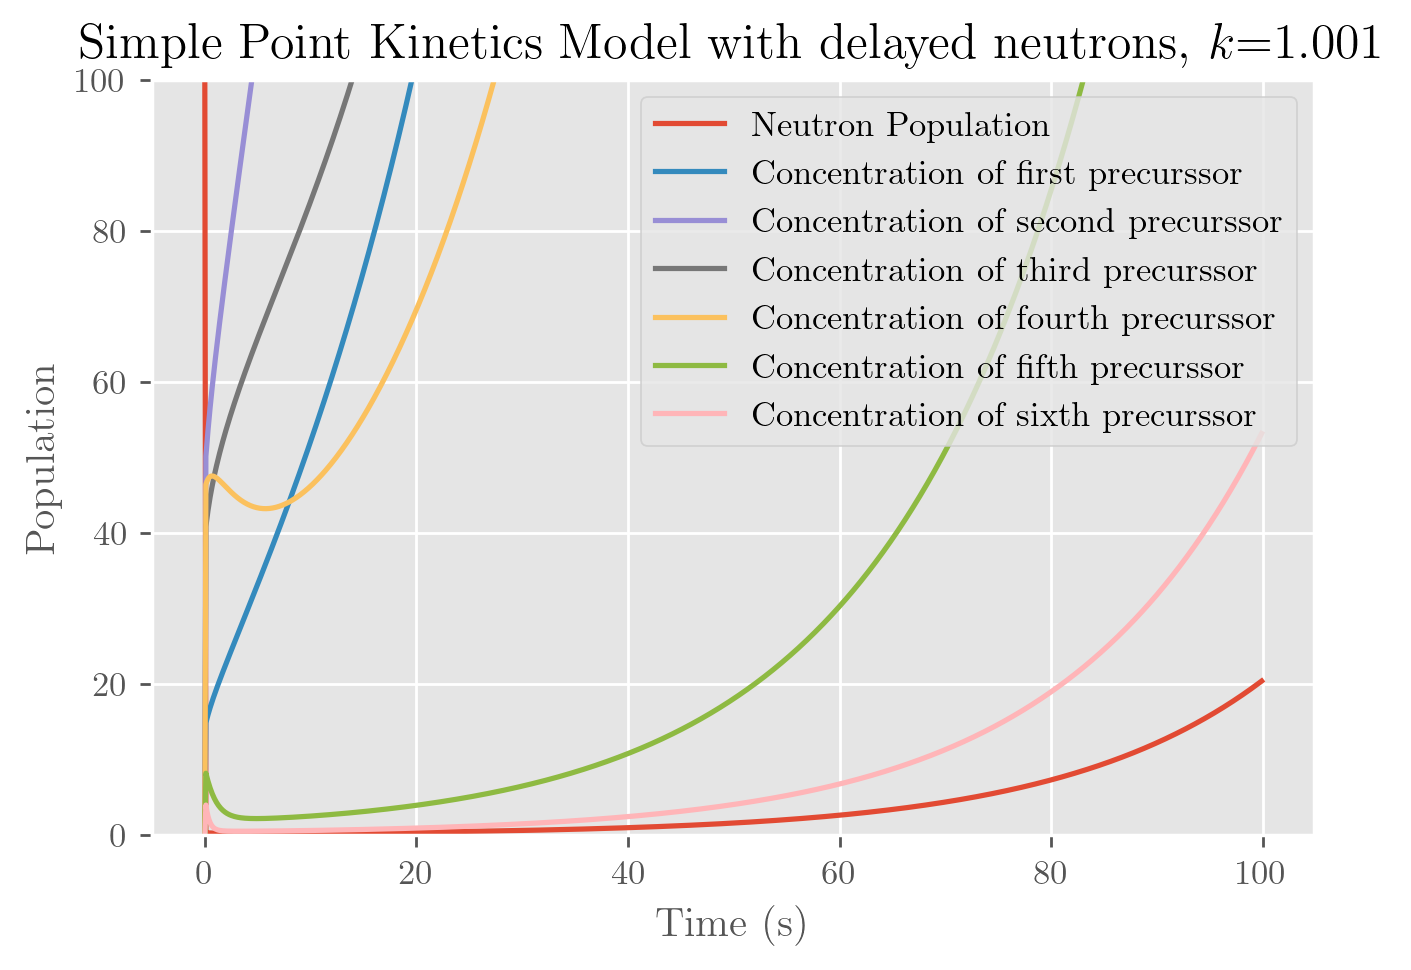

In [69]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi']= 250
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

fig = plt.figure()
plt.plot(t,n,label='Neutron Population')
plt.plot(t,C1,label='Concentration of first precurssor')
plt.plot(t,C2,label='Concentration of second precurssor')
plt.plot(t,C3,label='Concentration of third precurssor')
plt.plot(t,C4,label='Concentration of fourth precurssor')
plt.plot(t,C5,label='Concentration of fifth precurssor')
plt.plot(t,C6,label='Concentration of sixth precurssor')


plt.legend(loc='upper right')

plt.xlabel('Time (s)')


plt.ylabel('Population')


plt.title("Simple Point Kinetics Model with delayed neutrons, $k$={}".format(k))
plt.draw()
plt.savefig('exactprk.png', dpi=300)
plt.draw()
plt.show()